```{include} ../math-definitions.md
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import multivariate_normal as mvn

np.random.seed(2020)
sns.set_style("dark")

# Dinámica de un VAR


## La función de impulso respuesta



\begin{equation*}
\hat{Y}_{t+s} = \xi_{t+s} + \Phi\xi_{t+s-1} +\dots+ \alert{\Phi^s\xi_{t}} + \Phi^{s+1}\hat{Y}_{t-1}
\end{equation*}

La función de **impulso-respueta** mide la respuesta observada en la variable $m$-ésima $s$ períodos después ($\hat{Y}_{t+s,m}$) de que se presenta un impulso en la $k$-ésima variable ($\xi_{t,k}$)

Viene dada por
\begin{equation*}
\marginal{\hat{Y}_{t+s,m}}{\xi_{t,k}} = \left(\Phi^s\right)_{km}
\end{equation*}

es decir, por el elemento en la fila $k$, columna $m$, de la matriz $\Phi$ elevada al número de períodos $s$.



## Interpretando la función de impulso-respuesta
Suponga que

-  el sistema estaba en equilibrio en $t-1$, es decir $\alert{\hat{Y}_{t-1}=0}$
-  hay un shock $v' = \MAT{v_1&\dots&v_n}$ a las variables en $t$, $\alert{\xi_t = v}$
-  el shock es transitorio: $\alert{0=\xi_{t+1} = \xi_{t+2}=\dots}$

En este caso, la desviación del sistema respecto a su equilibrio $s$ períodos después del shock es
\begin{equation*}
\hat{Y}_{t+s} = \Phi^sv
\end{equation*}


\begin{equation*}
\Omega = PP' = \left[\Gamma_0^{-1}\Sigma^{1/2}\right] \left[\Gamma_0^{-1}\Sigma^{1/2}\right]' = \Gamma_0^{-1}\Sigma{\Gamma'}_0^{-1}
\end{equation*}

En la práctica, estamos interesados en shocks $\varepsilon_t$ a las ecuaciones estructurales, en vez de a las ecuaciones reducidas $\epsilon_t$. Esto para tomar en cuenta los efectos contemporáneos del shock.

Para calcular las respuestas, nos valemos de $\epsilon_t = \Gamma_0^{-1}\varepsilon_t$ y de la descomposición de Cholesky de la covarianza de los errores reducidos $\Omega$:

| Tamaño del impulso | Impulso estructural          | Impulso reducido                | Respuesta                          |
|--------------------|------------------------------|---------------------------------|------------------------------------|
| unitarios          | $\varepsilon_t=I$            | $v = \Gamma_0^{-1}$             | $\Phi^s\Gamma_0^{-1}$              |
| 1 desv. estándar   | $\varepsilon_t=\Sigma^{1/2}$ | $v = \Gamma_0^{-1}\Sigma^{1/2}$ | $\Phi^s \Gamma_0^{-1}\Sigma^{1/2}$ |


{{ empieza_ejemplo }} Impulso respuesta y descomposición de Cholesky {{ fin_titulo_ejemplo }}

Siguiendo con el ejemplo anterior, si $y'_t=\MAT{m_t & r_t & k_t}$ y la matriz de covarianza reducida es

\begin{equation*}
\begin{aligned}
\Omega = \MAT{1 & 0.5 & -1 \\ 0.5 & 4.25 & 2.5\\ -1 &  2.5 & 12.25}
&=\simbolo{\MAT{1 & 0 & 0\\ 0.5 & 2 & 0\\-1 & 1.5 & 3}}{P}
\simbolo{\MAT{1 & 0.5 & -1\\ 0 & 2 & 1.5 \\0 & 0 & 3}}{P'} \\
&=\simbolo{\MAT{1 & 0 & 0\\ 0.5 & 1 & 0\\-1 & 0.75 & 1}}{\Gamma_0^{-1}}
\simbolo{\MAT{1 & 0 & 0\\ 0 & 4 & 0 \\0 & 0 & 9}}{\Sigma}
\simbolo{\MAT{1 & 0.5 & -1\\ 0 & 1 & 0.75 \\0 & 0 & 1}}{{\Gamma'}_0^{-1}}
\end{aligned}
\end{equation*}

La respuesta del sistema a un shock en $k_t$ se calcula a partir de...

-  $v'=\MAT{0 & 2 & 1.5}$ si el shock es de una desviación estándar.
-  $v'=\MAT{0 & 1 & 0.75}$ si el shock es unitario.
{{ termina_ejemplo }}


## Estacionariedad

\begin{equation*}
\hat{Y}_{t+s} = \xi_{t+s} + \Phi\xi_{t+s-1} +\dots+\Phi^s\xi_{t} + \Phi^{s+1}\hat{Y}_{t-1}
\end{equation*}

Recuerde que la respuesta del VAR $s$ períodos después a un impulso $\xi_{t}$ es $\Phi^s\xi_{t}$.

Si el VAR es estacionario, toda respuesta a cualquier impulso en $t$ debe ser transitoria:
\begin{equation*}
\lim\limits_{s\to\infty}\Phi^s\xi_{t} = 0.
\end{equation*}

De lo contrario, la media $\mu$ del proceso no sería constante.

Es decir, el VAR es estacionario si y sólo si
\begin{equation*}
\lim\limits_{s\to\infty}\Phi^s = 0
\end{equation*}



## Condiciones para la estacionariedad

$Y$ es estacionario si y solo si todos los eigenvalores de $\Phi$ están dentro {ref}`del círculo unitario<appendix:mult-complex>`.

Los eigenvalores $\lambda$ de $\Phi$ satisfacen:
\begin{equation*}
\left|I\lambda^p - \Phi_1\lambda^{p-1} - \dots -\Phi_p\right| = 0
\end{equation*}

{{ empieza_ejemplo }}  Estacionariedad de un VAR(2) {{ fin_titulo_ejemplo }}

Para el VAR(2) del ejemplo anterior:

\begin{align*}
0 &=\left|\MAT{1 & 0 \\ 0 & 1}\lambda^2 - \MAT{.5 & .1\\.4 & .5}\lambda - \MAT{0 & 0\\.25 & 0} \right| \\
 &=\left|\MAT{\lambda^2 -.5\lambda & -.1\lambda \\ -.4\lambda -.25 & \lambda^2 - .5\lambda} \right|\\
&=\left(\lambda^2 -.5\lambda\right)\left(\lambda^2 - .5\lambda\right)-\left(-.4\lambda -.25\right)\left(-.1\lambda \right) \\
&= \lambda^4 -\lambda^3+0.21\lambda^2-0.025\lambda
\end{align*}

Las raíces de este polinomio son
\begin{align*}
\lambda_1 &= 0                &\rightarrow |\lambda_1| &= 0      \\
\lambda_2 &= 0.7693           &\rightarrow |\lambda_2| &= 0.7693      \\
\lambda_3 &= 0.1154+0.1385i   &\rightarrow |\lambda_3| &= \sqrt{0.1154^2+0.1385^2} \approx 0.1803  \\
\lambda_4 &= 0.1154-0.1385i   &\rightarrow |\lambda_4| &= \sqrt{0.1154^2+0.1385^2} \approx 0.1803   
\end{align*}

todas ellas dentro del círculo unitario. Por lo tanto, el VAR es estacionario.
{{ termina_ejemplo }}








{{ empieza_ejemplo }} Dinámica de un VAR {{ fin_titulo_ejemplo }}

En este ejemplo se presentan análisis de modelos VAR(1), con dos y tres variables.

En particular, el modelo VAR(1) de dos variables se representa como

\begin{align*}
x_t &= c_1 + a_{11}x_{t-1} + a_{12}y_{t-1} + \epsilon_{x,t} \\
y_t &= c_2 + a_{21}x_{t-1} + a_{22}y_{t-1} + \epsilon_{y,t}
\end{align*}

y puede escribirse
\begin{equation*}
\underset{Y_t}{\begin{pmatrix}x_t \\ y_t\end{pmatrix}} =
\underset{c}{\begin{pmatrix}c_1 \\ c_2\end{pmatrix}} +
\underset{A}{\begin{pmatrix}a_{11} & a_{12} \\ a_{21} & a_{22}\end{pmatrix}}
\underset{Y_{t-1}}{\begin{pmatrix}x_{t-1} \\ y_{t-1}\end{pmatrix}} +
\underset{\epsilon_t}{\begin{pmatrix}\epsilon_{x,t} \\ \epsilon_{y,t}\end{pmatrix}}
\end{equation*}

In [2]:
"""
Una clase para representar un VAR(1)

El trabajo se simplifica enormemente si creamos una clase para representar el VAR(1). En su implementación, definimos métodos para simularlo, determinar si es estable, y calcular la función de impulso respuesta. Para crear un objeto VAR(1), basta con pasarle a esta clase tres matrices: los interceptos, los coeficientes del rezago, y la varianza de los errores.
"""

class VAR1:
    def __init__(self,c,A,omega):
        self.c = np.asarray(c)
        self.A = np.asarray(A)
        self.omega = np.asarray(omega)
        self.n = self.c.size
        self.names = [name for name in 'xyzuvw'[:self.n]]
        self.shock = lambda : mvn(np.zeros(self.n), self.omega)

    def simulate(self, T=101):
        ''' Simula el VAR(1) T períodos'''
        X = np.zeros((T,self.n))
        try:
            X[0] = (np.linalg.inv(np.eye(2) - A) @ c).T
        except:
            pass

        for t in range(1, T):
            X[t] = self.c.T + X[t-1] @ self.A.T + self.shock()
        return pd.DataFrame(X, columns=self.names)

    def stability(self):
        ''' Determina la estabilidad del VAR a partir de los eigenvalores'''
        eigenvalues = np.linalg.eigvals(self.A)

        fig = plt.figure(figsize=[12,6])
        ax1 = fig.add_subplot(1, 2, 1, polar=True)
        ax1.plot(np.angle(eigenvalues), abs(eigenvalues),marker='o',linewidth=0)
        ax1.set(ylim=[0,1], yticks=[1], yticklabels=[''], xticks=np.arange(4)*np.pi/2)

        # tabla con eigenvalores
        # Nota > como texto para controlar su formato
        df = pd.DataFrame({'eigenvalor': [f'{𝜆:.3g}' for 𝜆 in eigenvalues],
                           'módulo': [f'{a:.3g}' for a in abs(eigenvalues)]})  

        ax2 = fig.add_subplot(1, 2, 2)
        ax2.axis('off')
        tbl = ax2.table(cellText = df.values,
                        colLabels = df.columns,
                        colColours = ['C0']*2,
                        bbox=[0, 0.25, 1, 0.5])
        tbl.auto_set_font_size(False)
        tbl.set_fontsize(16)

    def irf(self, h=40, unit=True, plot=True, figsize=[12,6],**kwargs):
        ''' Calcula la función de impulso respuesta'''
        n = self.n

        impulse = np.eye(n) if unit else np.linalg.cholesky(self.omega)

        print('Los impulsos son ')
        for k in range(n):
            print(self.names[k],":  " ,impulse[:,k])

        X = np.zeros((h+1, n, n))
        X[0] = impulse
        for t in range(h):
            X[t+1] = self.A @ X[t]

        cols = [f'{y} --> {x}' for x in self.names for y in self.names]
        data = pd.DataFrame(X.reshape(h+1,n*n), columns=cols)
        if plot:
            data.plot(subplots=True, layout=(n,n), figsize=figsize,
                      title='Impulse-response function',**kwargs)
        else:
             return data   

    def analysis(self, T=101, h=40, unit=True, plot=True, **kwargs):
        ''' Analiza el VAR: estabilidad, simulación, impulso-respuesta'''
        self.stability()
        self.simulate(T).plot(title="Simulated VAR(1) process", figsize=[12,5])
        self.irf(h=h,unit=unit,plot=plot,**kwargs)

**MODELO 1**

 \begin{align*}
x_t &= 0.7x_{t-1} + 0.2y_{t-1} + \epsilon_{x,t} \\
y_t &= 0.2x_{t-1} + 0.7y_{t-1} + \epsilon_{y,t}
\end{align*}

que puede escribirse
\begin{equation*}
\underset{Y_t}{\begin{pmatrix}x_t \\ y_t\end{pmatrix}} =
\underset{\Phi}{\begin{pmatrix}0.7 & 0.2 \\ 0.2 & 0.7\end{pmatrix}}
\underset{Y_{t-1}}{\begin{pmatrix}x_{t-1} \\ y_{t-1}\end{pmatrix}} +
\underset{\epsilon_t}{\begin{pmatrix}\epsilon_{x,t} \\ \epsilon_{y,t}\end{pmatrix}}
\quad\qquad
\Omega = \begin{pmatrix}1 & 0 \\ 0 & 1\end{pmatrix}
\end{equation*}

Los impulsos son 
x :   [1. 0.]
y :   [0. 1.]


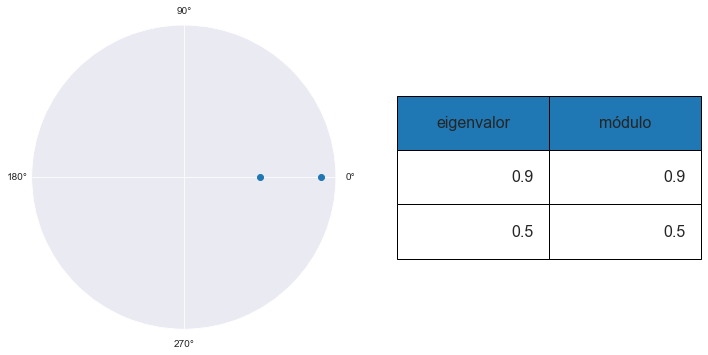

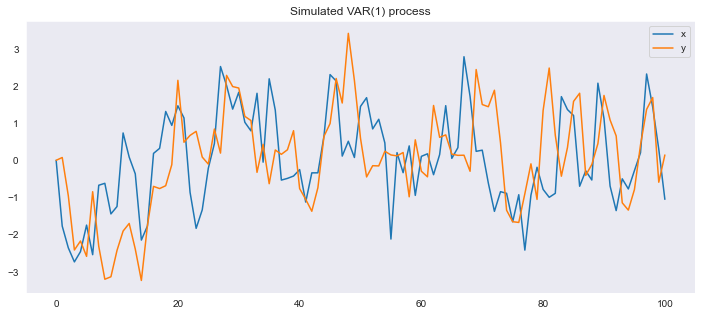

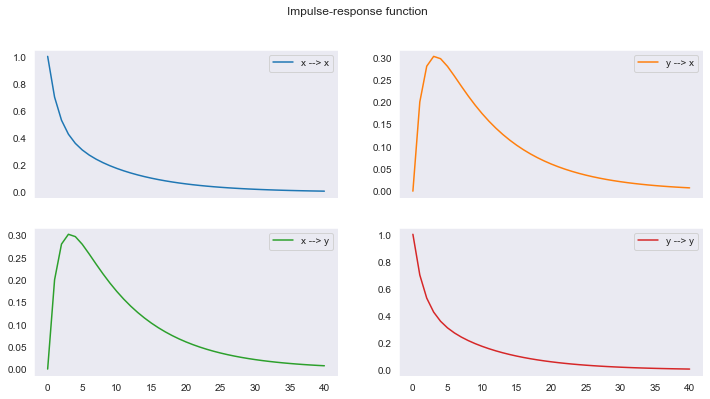

In [3]:
intercepto = [0, 0]
pendientes = [[0.7,0.2],[0.2, 0.7]]
omega = np.eye(2)

model1 = VAR1(intercepto,pendientes , omega)
model1.analysis()

**MODELO 2**

\begin{align*}
x_t &= 0.5 + 0.5x_{t-1} + 0.5y_{t-1} + \epsilon_{x,t} \\
y_t &= 0.0 + 0.5x_{t-1} + 0.5y_{t-1} + \epsilon_{y,t}
\end{align*}

que puede escribirse
\begin{equation*}
\underset{Y_t}{\begin{pmatrix}x_t \\ y_t\end{pmatrix}} =
\underset{c}{\begin{pmatrix}0.5 \\ 0.0\end{pmatrix}} =
\underset{\Phi}{\begin{pmatrix}0.5 & 0.5 \\ 0.5 & 0.5\end{pmatrix}}
\underset{Y_{t-1}}{\begin{pmatrix}x_{t-1} \\ y_{t-1}\end{pmatrix}} +
\underset{\epsilon_t}{\begin{pmatrix}\epsilon_{x,t} \\ \epsilon_{y,t}\end{pmatrix}}
\quad\qquad
\Omega = \begin{pmatrix}1.0 & -0.4 \\ -0.4 & 1.0\end{pmatrix}
\end{equation*}

En este caso, el VAR tiene una raíz unitaria, por lo que no es estable. Observe como las funciones de impulso respuesta no regresan a cero.

Por otra parte, dado que la matriz $\Phi$ es idempotente, luego de un período la respuesta es constante.

Los impulsos son 
x :   [1. 0.]
y :   [0. 1.]


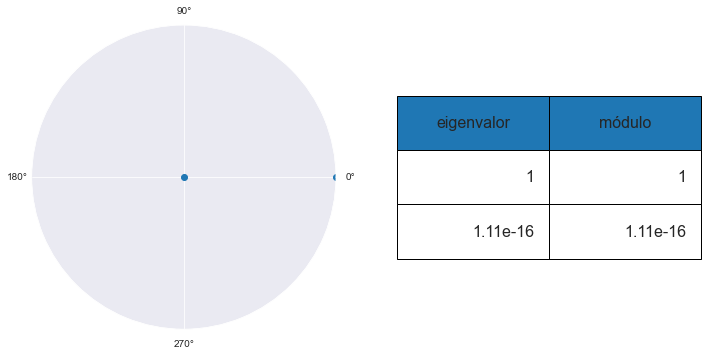

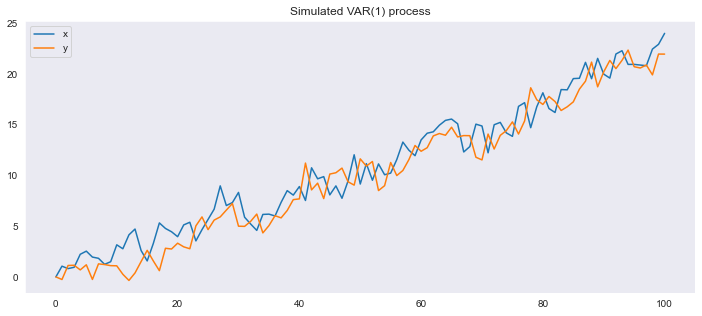

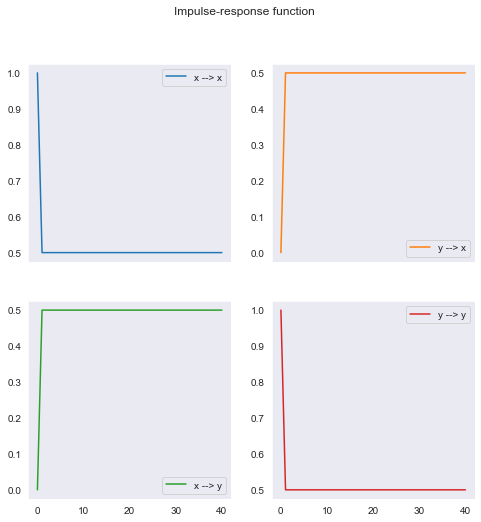

In [4]:
intercepto = [0.5, 0]
pendientes = [[0.5,0.5],[0.5, 0.5]]
omega = [[1,-0.4],[-0.4, 1]]

model2 = VAR1(intercepto, pendientes , omega)
model2.analysis(figsize=[8,8])

**MODELO 3**
\begin{align*}
x_t &= 0.5 + 0.95x_{t-1} + 0.0y_{t-1} + \epsilon_{x,t} \\
y_t &= 0.0 + 0.2x_{t-1} + 0.7y_{t-1} + \epsilon_{y,t}
\end{align*}

que puede escribirse
\begin{equation*}
\underset{Y_t}{\begin{pmatrix}x_t \\ y_t\end{pmatrix}} =
\underset{c}{\begin{pmatrix}0.5 \\ 0.0\end{pmatrix}} =
\underset{\Phi}{\begin{pmatrix}0.95 & 0.0 \\ 0.2 & 0.7\end{pmatrix}}
\underset{Y_{t-1}}{\begin{pmatrix}x_{t-1} \\ y_{t-1}\end{pmatrix}} +
\underset{\epsilon_t}{\begin{pmatrix}\epsilon_{x,t} \\ \epsilon_{y,t}\end{pmatrix}}
\quad\qquad
\Omega = \begin{pmatrix}2.0 & -0.4 \\ -0.4 & 1.0\end{pmatrix}
\end{equation*}

En este caso, el VAR tiene ambas raíces dentro del círculo unitario, por lo que es estable. La mayor de las raíces tiene un valor cercano a uno, por lo que las respuestas a los impulsos tienden a ser muy persistentes.

Los impulsos son 
x :   [1. 0.]
y :   [0. 1.]


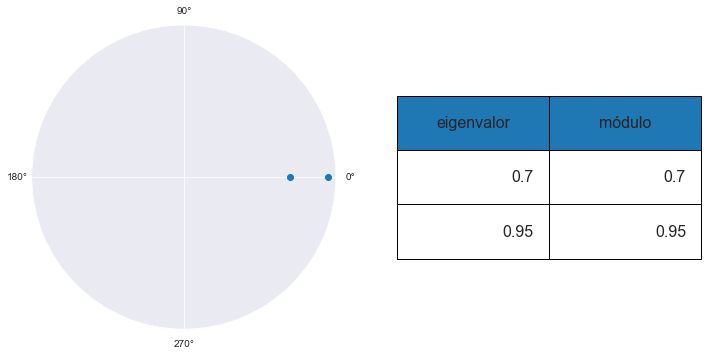

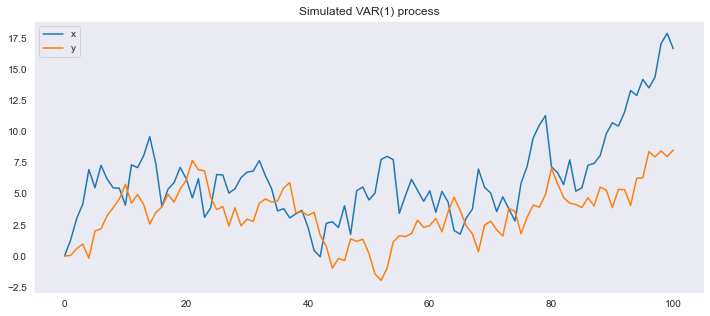

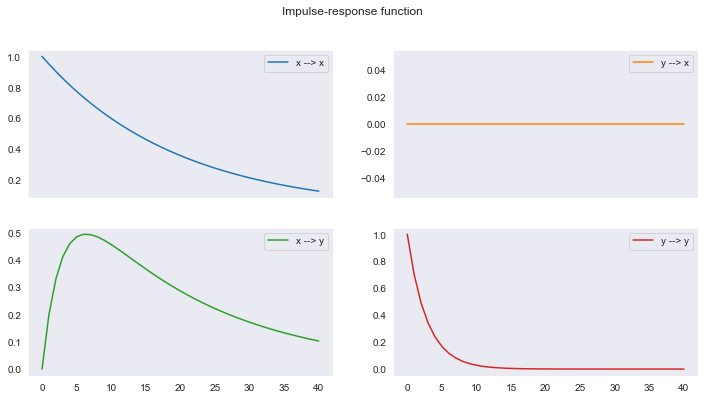

In [5]:
intercepto = [0.5, 0]
pendientes = [[0.95,0.0],[0.2, 0.7]]
omega = [[2,-0.4],[-0.4, 1]]

model3 = VAR1(intercepto,pendientes , omega)
model3.analysis()

Los impulsos en la gráfica anterior son unitarios. Ahora, graficamos la impulso respuesta para impulsos de una desviación estándar a partir de la descomposición de Cholesky de la matriz varianza covarianza.

Los impulsos son 
x :   [ 1.41421356 -0.28284271]
y :   [0.        0.9591663]


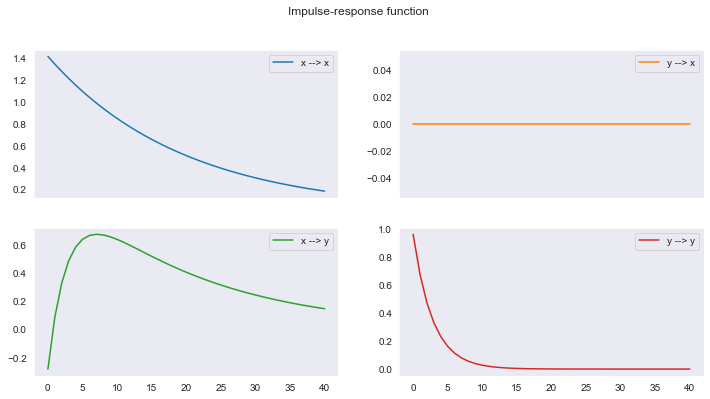

In [6]:
model3.irf(unit=False)

**MODELO 4**
\begin{align*}
x_t &= 2.0 + 0.5x_{t-1} + 0.0y_{t-1} + 1.0z_{t-1} + \epsilon_{x,t} \\
y_t &= 1.0 + 0.1x_{t-1} + 0.1y_{t-1} + 0.3z_{t-1} + \epsilon_{y,t} \\
z_t &= 1.5 + 0.0x_{t-1} + 0.2y_{t-1} + 0.3z_{t-1} + \epsilon_{z,t}
\end{align*}

que puede escribirse
\begin{equation*}
\underset{Y_t}{\begin{pmatrix}x_t \\ y_t \\ z_t \end{pmatrix}} =
\underset{c}{\begin{pmatrix}2.0 \\ 1.0\\ 1.5 \end{pmatrix}} =
\underset{\Phi}{\begin{pmatrix}0.5 & 0 & 1\\ 0.1 & 0.1 & 0.3\\0 & 0.2 & 0.3\end{pmatrix}}
\underset{Y_{t-1}}{\begin{pmatrix}x_{t-1} \\ y_{t-1} \\ z_{t-1}\end{pmatrix}} +
\underset{\epsilon_t}{\begin{pmatrix}\epsilon_{x,t} \\ \epsilon_{y,t}\\ \epsilon_{z,t}\end{pmatrix}}
\quad\qquad
\Omega = \begin{pmatrix}1 & 0.5 & -1 \\ 0.5 & 4.25 & 2.5\\ -1 &  2.5 & 12.25\end{pmatrix}
\end{equation*}

En este caso, el VAR tiene sus tres raíces dentro del círculo unitario, por lo que es estable. La mayor de las raíces en valor absoluto es 0.65, por lo que las respuestas a los impulsos son menos persistentes que en el ejemplo anterior.

Los impulsos son 
x :   [ 1.   0.5 -1. ]
y :   [0.  2.  1.5]
z :   [0. 0. 3.]


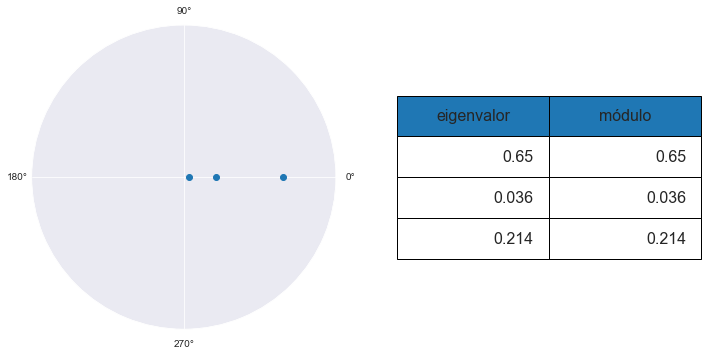

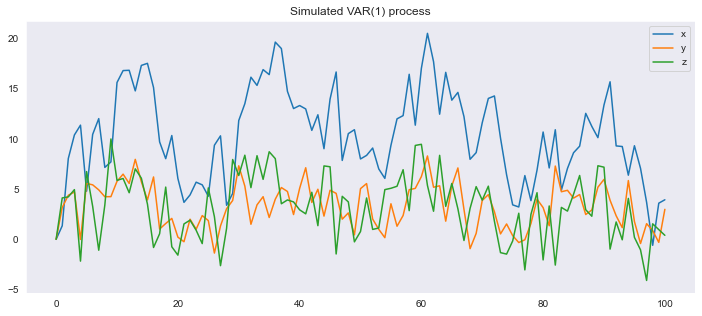

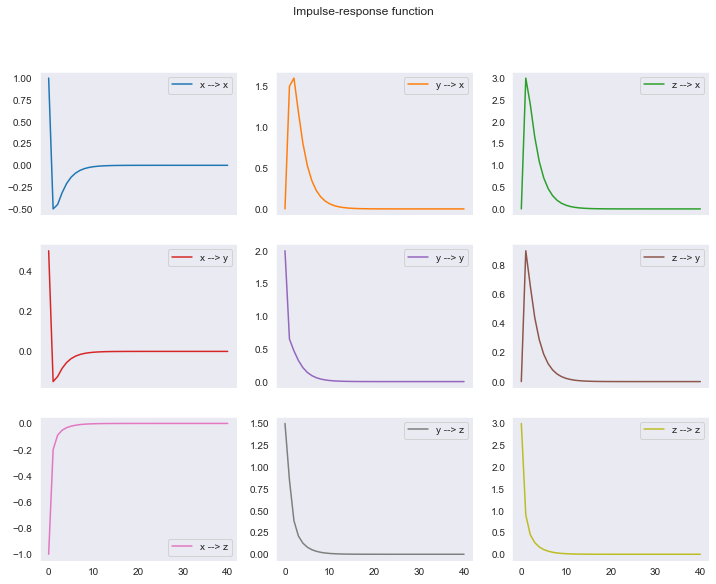

In [7]:
intercepto = [2, 1, 1.5]
pendientes = [[0.5,0, 1],[0.1, 0.1,0.3],[0,0.2,0.3]]
omega = [[1,0.5,-1],[0.5, 4.25, 2.5],[-1.00,2.5,12.25]]

model4 = VAR1(intercepto,pendientes , omega)
model4.analysis(figsize=[12,9], unit=False)

**MODELO 5**
\begin{align*}
x_t &= 2.0 + 0.5x_{t-1} - 0.75y_{t-1} + 4.0z_{t-1} + \epsilon_{x,t} \\
y_t &= 1.0 - 0.2x_{t-1} + 0.1y_{t-1} + 0.3z_{t-1} + \epsilon_{y,t} \\
z_t &= 1.5 - 1.0x_{t-1} + 0.2y_{t-1} + 0.5z_{t-1} + \epsilon_{z,t}
\end{align*}

que puede escribirse
\begin{equation*}
\underset{Y_t}{\begin{pmatrix}x_t \\ y_t \\ z_t \end{pmatrix}} =
\underset{c}{\begin{pmatrix}2.0 \\ 1.0\\ 1.5 \end{pmatrix}} =
\underset{\Phi}{\begin{pmatrix}0.5 & -0.75 & 4\\ -0.2 & 0.1 & 0.3\\ -0.1 & 0.2 & 0.5\end{pmatrix}}
\underset{Y_{t-1}}{\begin{pmatrix}x_{t-1} \\ y_{t-1} \\ z_{t-1}\end{pmatrix}} +
\underset{\epsilon_t}{\begin{pmatrix}\epsilon_{x,t} \\ \epsilon_{y,t}\\ \epsilon_{z,t}\end{pmatrix}}
\quad\qquad
\Omega = \begin{pmatrix}1 & 0.5 & -1 \\ 0.5 & 4.25 & 2.5\\ -1 &  2.5 & 12.25\end{pmatrix}
\end{equation*}

En este caso, el VAR tiene sus tres raíces dentro del círculo unitario, por lo que es estable. Las mayores de las raíces en valor absoluto son complejas con módulo 0.907, por lo que las respuestas a los impulsos oscilan alrededor del eje horizontal.

Los impulsos son 
x :   [ 1.   0.5 -1. ]
y :   [0.  2.  1.5]
z :   [0. 0. 3.]


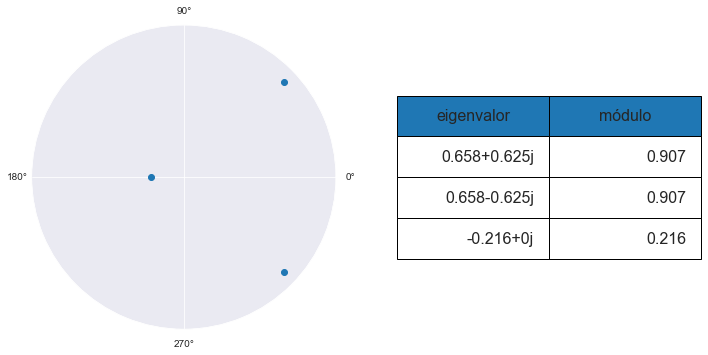

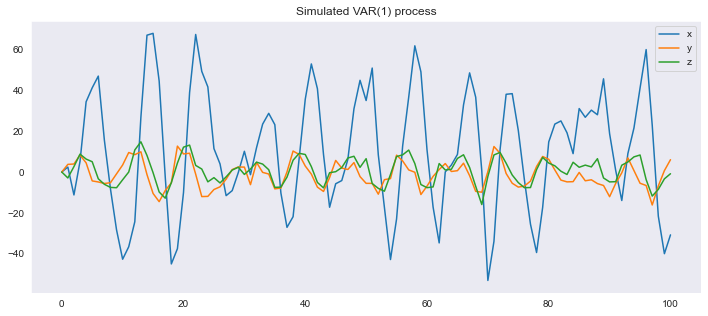

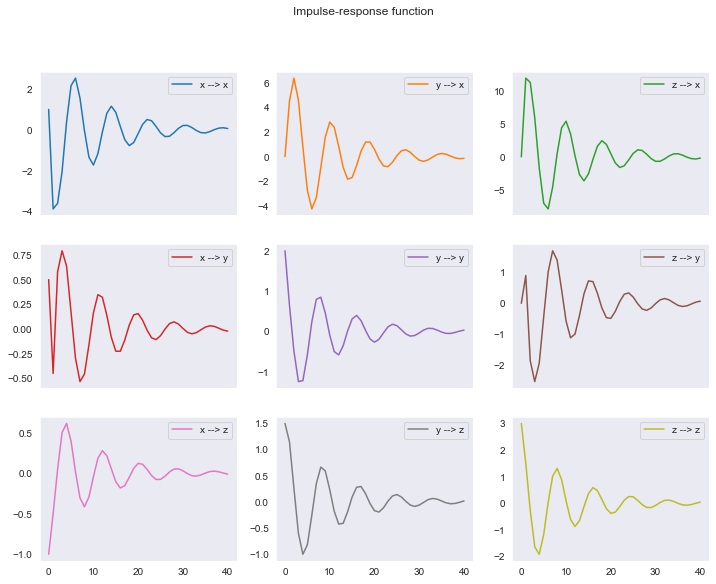

In [8]:
intercepto = [2, 1, 1.5]
omega = [[1,0.5,-1],[0.5, 4.25, 2.5],[-1.00,2.5,12.25]]

pendientes = [[0.5,-0.75, 4],[-0.2, 0.1,0.3],[-0.1,0.2,0.5]]
model5 = VAR1(intercepto,pendientes , omega)
model5.analysis(unit=False, figsize=[12,9])

{{ termina_ejemplo }}